Number of samples: 3680
Extracting classes... (be patient)


100%|██████████| 3680/3680 [00:08<00:00, 439.15it/s]


Number of unique classes: 37


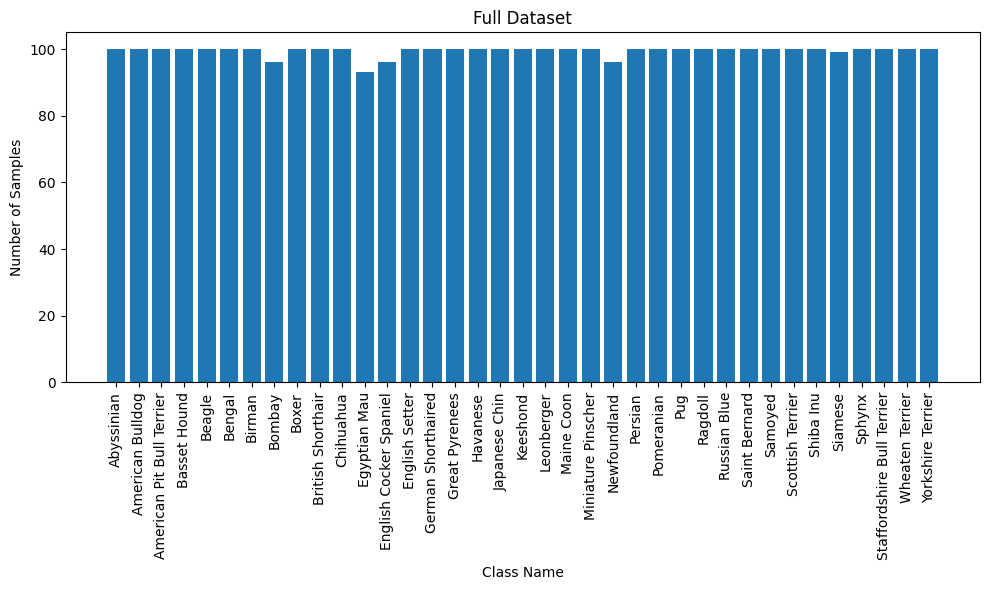

Number of samples: 1600
Extracting classes... (be patient)


100%|██████████| 1600/1600 [00:03<00:00, 436.83it/s]


Number of unique classes: 33


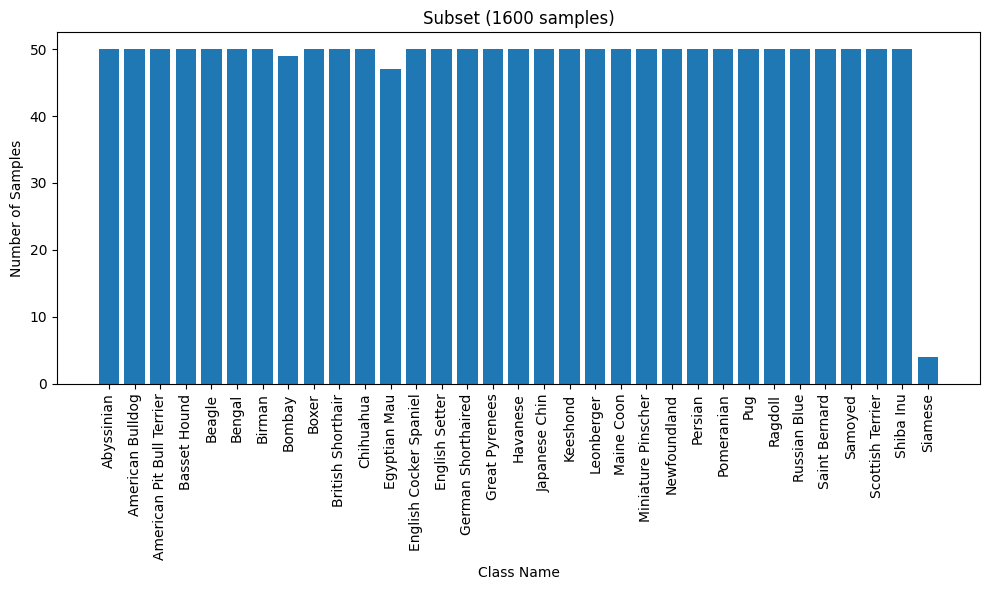

Number of samples: 1600
Extracting classes... (be patient)


100%|██████████| 1600/1600 [00:03<00:00, 439.28it/s]


Number of unique classes: 37


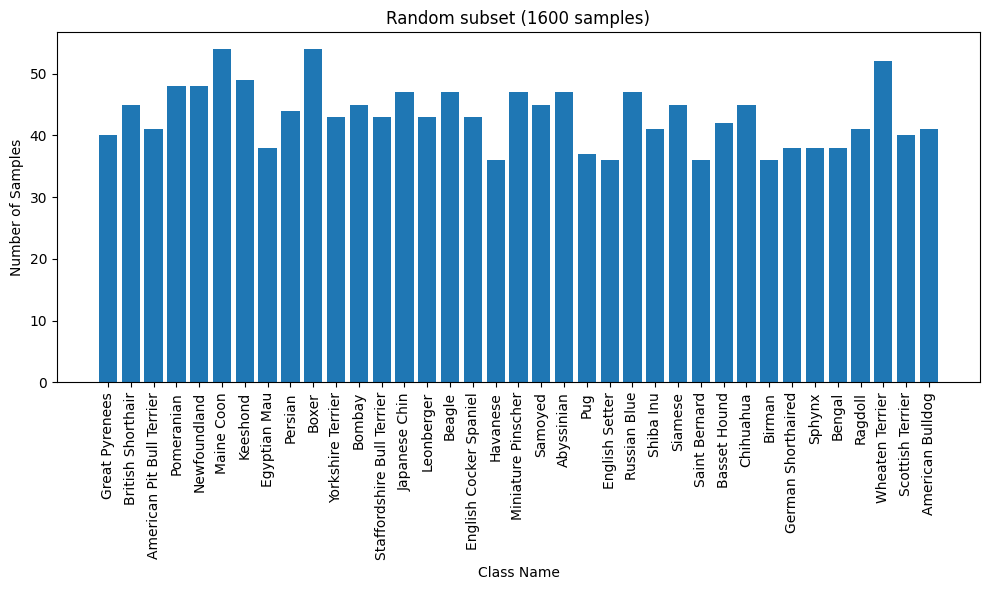

Creating balanced split...


100%|██████████| 3680/3680 [00:08<00:00, 442.33it/s]


Number of samples: 1619
Extracting classes... (be patient)


100%|██████████| 1619/1619 [00:03<00:00, 442.56it/s]


Number of unique classes: 37


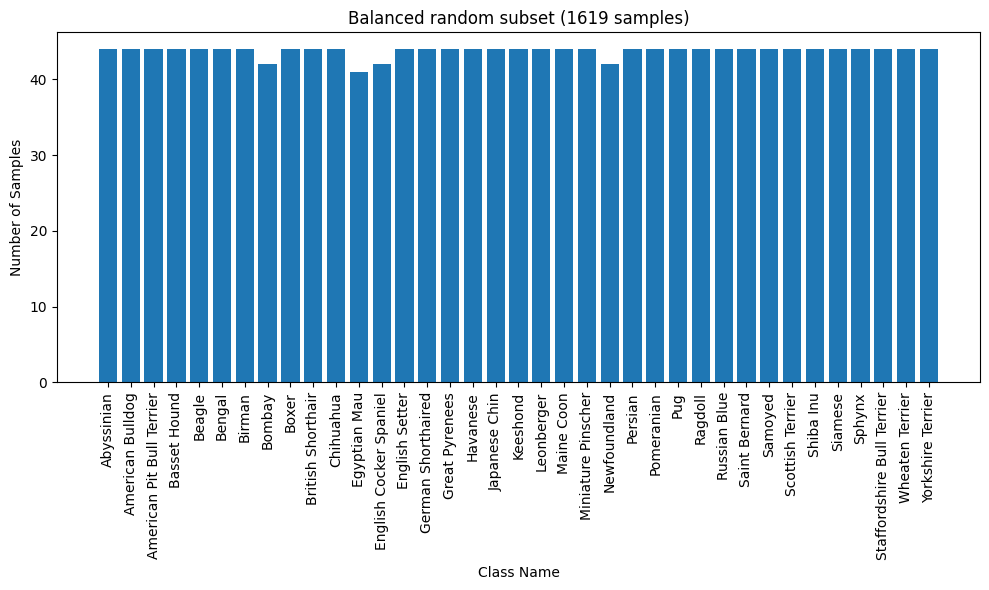

In [1]:
from determinism import Determinism
determinism = Determinism(seed=42).sow() 

import torch
from torch.utils.data import Dataset, Subset
import matplotlib.pyplot as plt
from collections import Counter
import random
from tqdm import tqdm

from datasets import load_dataset, balanced_random_split

def plot_class_histogram(dataset, title="Class Distribution"):
    print(f"Number of samples: {len(dataset)}")
    print("Extracting classes... (be patient)")
    if isinstance(dataset, torch.utils.data.Subset):
        labels = [dataset.dataset[i][1] for i in tqdm(dataset.indices)]
        class_to_idx = dataset.dataset.class_to_idx
    else:
        labels = [dataset[i][1] for i in tqdm(range(len(dataset)))]
        class_to_idx = dataset.class_to_idx

    label_counts = Counter(labels)
    idx_to_class = {v: k for k, v in class_to_idx.items()}
    class_names = [idx_to_class[i] for i in label_counts.keys()]
    num_classes = len(set(labels))
    print(f"Number of unique classes: {num_classes}")

    plt.figure(figsize=(10, 6))
    plt.bar(class_names, label_counts.values())
    plt.xlabel("Class Name")
    plt.ylabel("Number of Samples")
    plt.title(title)
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()
    
dataset = load_dataset("trainval", transform=None)
plot_class_histogram(dataset, title="Full Dataset")

dataset_1600 = torch.utils.data.Subset(dataset, range(1600))
plot_class_histogram(dataset_1600, title="Subset (1600 samples)")

dataset_1600_random = torch.utils.data.Subset(dataset, random.sample(range(len(dataset)), 1600))
plot_class_histogram(dataset_1600_random, title="Random subset (1600 samples)")

dataset_1600_balanced, _ = balanced_random_split(dataset, [1600, len(dataset)-1600])
plot_class_histogram(dataset_1600_balanced, title=f"Balanced random subset ({len(dataset_1600_balanced)} samples)")